In [64]:
import pandas as pd
import numpy as np
import warnings
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

#import psycopg2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

In [2]:
pip install -U airportsdata

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import airportsdata

# Load the airports data
airports = airportsdata.load()

# Convert the airports data into a DataFrame
airports_df = pd.DataFrame(airports)
airports_df
# Transpose the DataFrame
airports_df1 = airports_df.transpose()
# If you want to reset the index of the transposed DataFrame
airports_df1.reset_index(drop=True, inplace=True)


In [4]:
airports_df1

,icao,iata,name,city,subd,country,elevation,lat,lon,tz,lid
0,00AA,,Aero B Ranch Airport,Leoti,Kansas,US,3435.0,38.704022,-101.473911,America/Chicago,00AA
1,00AK,,Lowell Field,Anchor Point,Alaska,US,252.0,59.948889,-151.692222,America/Anchorage,00AK
2,00AL,,Epps Airpark,Harvest,Alabama,US,820.0,34.86481,-86.770278,America/Chicago,00AL
3,00AN,,Katmai Lodge Airport,King Salmon,Alaska,US,80.0,59.093472,-156.455833,America/Anchorage,00AN
4,00AR,,Arland Airport,Bennington,Kansas,US,1352.0,38.969651,-97.601557,America/Chicago,00AR
...,...,...,...,...,...,...,...,...,...,...,...
28171,ZYXC,XEN,Xingcheng Air Base,,Liaoning,CN,30.0,40.580299,120.697998,Asia/Shanghai,
28172,ZYYJ,YNJ,Yanji Chaoyangchuan Airport,Yanji,Jilin,CN,624.0,42.882801,129.451004,Asia/Shanghai,
28173,ZYYY,,Shenyang Dongta Airport,Shenyang,Liaoning,CN,0.0,41.784401,123.496002,Asia/Shanghai,
28174,_AYM,AYM,Yas Island Seaplane Base,Yas Island,Abu Dhabi,AE,0.0,24.467,54.6103,Asia/Dubai,


In [5]:
#airports_df1.isnull().sum()

In [6]:
df_train = pd.read_csv('data/train.csv')
df_train.shape
df_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [7]:
df = df_train.copy()
df.drop('ID', axis =1, inplace = True)
df

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [8]:
# Selecting required columns from airports_df1
selected_airports_df = airports_df1[['lat', 'lon', 'iata']]

# Merge for departure airport details
df1 = df.merge(selected_airports_df.rename(columns={'lat': 'dep_lat', 'lon': 'dep_lon'}),
              left_on='DEPSTN', right_on='iata', how='left')

# Merge for arrival airport details
df2 = df1.merge(selected_airports_df.rename(columns={'lat': 'arr_lat', 'lon': 'arr_lon'}),
              left_on='ARRSTN', right_on='iata', how='left')

# Drop the redundant 'iata' columns
#df.drop(['iata_x', 'iata_y'], axis=1, inplace=True)

# Optionally, drop other redundant columns if necessary
# df.drop(['DEPSTN_x', 'ARRSTN_x', 'DEPSTN_y', 'ARRSTN_y'], axis=1, inplace=True)

# Display the updated DataFrame
df2.drop(['iata_x', 'iata_y'], axis=1, inplace=True)
df2

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755


In [9]:
df2.columns
df = df2.copy()

In [10]:

# Convert DATOP column to datetime format
df['DATOP'] = pd.to_datetime(df['DATOP'])

# Extract year, month, day, and week
df['Year'] = df['DATOP'].dt.year
df['Month'] = df['DATOP'].dt.month
df['Day'] = df['DATOP'].dt.day
df['Weekday'] = df['DATOP'].dt.dayofweek  # Monday=0, Sunday=6

# Reorder columns
#df = df[['FLTID','DATOP', 'Year', 'Month', 'Day', 'Weekday', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC', 'target']]


df

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272,2018,7,5,3
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272,2018,1,13,5
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272,2018,11,7,2
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755,2018,1,23,1


In [11]:
# Convert STD and STA columns to datetime objects with correct format
df['STD'] = pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] = pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')

# Calculate flight duration in minutes
df['Flight_Duration'] = (df['STA'] - df['STD']).dt.total_seconds() / 60

df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6,145.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2,110.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5,155.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6,170.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6,80.0


In [12]:
# Split STD column into date and time columns
df['STD_Date'] = pd.to_datetime(df['STD']).dt.date
df['STD_Time'] = pd.to_datetime(df['STD']).dt.time

# Split STA column into date and time columns
df['STA_Date'] = pd.to_datetime(df['STA']).dt.date
df['STA_Time'] = pd.to_datetime(df['STA']).dt.time

# Drop the original STD and STA columns
df.drop(columns=['STD', 'STA'], inplace=True)

# Print the DataFrame to verify the changes
df


,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,2018-01-13,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,2018-11-07,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,2018-01-23,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [13]:
# Define mapping dictionary
status_mapping = {'ATA': 0, 'DEP': 1, 'RTR': 2, 'SCH': 3, 'DEL': 4}

# Map the values in the 'STATUS' column using the mapping dictionary
df['STATUS'] = df['STATUS'].map(status_mapping)

# Print the unique values in the 'STATUS' column
print(df['STATUS'].unique()) 

[0 1 2 3 4]


In [14]:
df.columns

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STATUS', 'AC', 'target',
       'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Year', 'Month', 'Day',
       'Weekday', 'Flight_Duration', 'STD_Date', 'STD_Time', 'STA_Date',
       'STA_Time'],
      dtype='object')

In [15]:
df2 = df.drop(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'Year', 'AC',  'STD_Date', 'STD_Time', 'STA_Date',
       'STA_Time'], axis =1)

In [16]:
# Convert 'dep_lat' and 'dep_lon' to numerical values
df2['dep_lat'] = pd.to_numeric(df['dep_lat'])
df2['dep_lon'] = pd.to_numeric(df['dep_lon'])

# Convert 'arr_lat' and 'arr_lon' to numerical values
df2['arr_lat'] = pd.to_numeric(df['arr_lat'])
df2['arr_lon'] = pd.to_numeric(df['arr_lon'])

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATUS           107833 non-null  int64  
 1   target           107833 non-null  float64
 2   dep_lat          107501 non-null  float64
 3   dep_lon          107501 non-null  float64
 4   arr_lat          107501 non-null  float64
 5   arr_lon          107501 non-null  float64
 6   Month            107833 non-null  int32  
 7   Day              107833 non-null  int32  
 8   Weekday          107833 non-null  int32  
 9   Flight_Duration  107833 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 7.0 MB


In [18]:
df2.columns
corr_matrix = df2.corr()
corr_matrix

,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
STATUS,1.000000,-0.155119,-1.114093e-01,0.070138,-0.109329,0.068216,-0.027211,-4.893283e-03,-0.051412,0.042618
target,-0.155119,1.000000,-5.951891e-03,-0.010315,-0.024523,0.006347,0.020645,5.620904e-03,0.038514,-0.006306
dep_lat,-0.111409,-0.005952,1.000000e+00,-0.068579,0.063682,0.131513,0.027856,4.922807e-07,0.036361,-0.005262
dep_lon,0.070138,-0.010315,-6.857938e-02,1.000000,0.136240,0.046430,-0.037221,2.281884e-03,-0.009865,0.003190
arr_lat,-0.109329,-0.024523,6.368242e-02,0.136240,1.000000,-0.068888,0.027755,-1.061497e-05,0.009473,-0.005133
arr_lon,0.068216,0.006347,1.315128e-01,0.046430,-0.068888,1.000000,-0.036934,1.233484e-03,-0.027153,0.002052
Month,-0.027211,0.020645,2.785557e-02,-0.037221,0.027755,-0.036934,1.000000,9.412400e-03,0.005972,-0.000419
Day,-0.004893,0.005621,4.922807e-07,0.002282,-0.000011,0.001233,0.009412,1.000000e+00,-0.009119,0.005154
Weekday,-0.051412,0.038514,3.636072e-02,-0.009865,0.009473,-0.027153,0.005972,-9.119397e-03,1.000000,-0.002317
Flight_Duration,0.042618,-0.006306,-5.261953e-03,0.003190,-0.005133,0.002052,-0.000419,5.153789e-03,-0.002317,1.000000


In [19]:

df_corr = pd.DataFrame(corr_matrix)

# Filter features that have correlation > 0.1 with the target
high_corr_features = df_corr[df_corr['target'].abs() > 0.1]

# Remove features that have correlation > 0.5 with other features
independent_features = high_corr_features.loc[:, (high_corr_features.abs() < 0.5).all()]

# Print the independent features
print("Independent features:")
print(independent_features.columns.tolist())


Independent features:
['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']


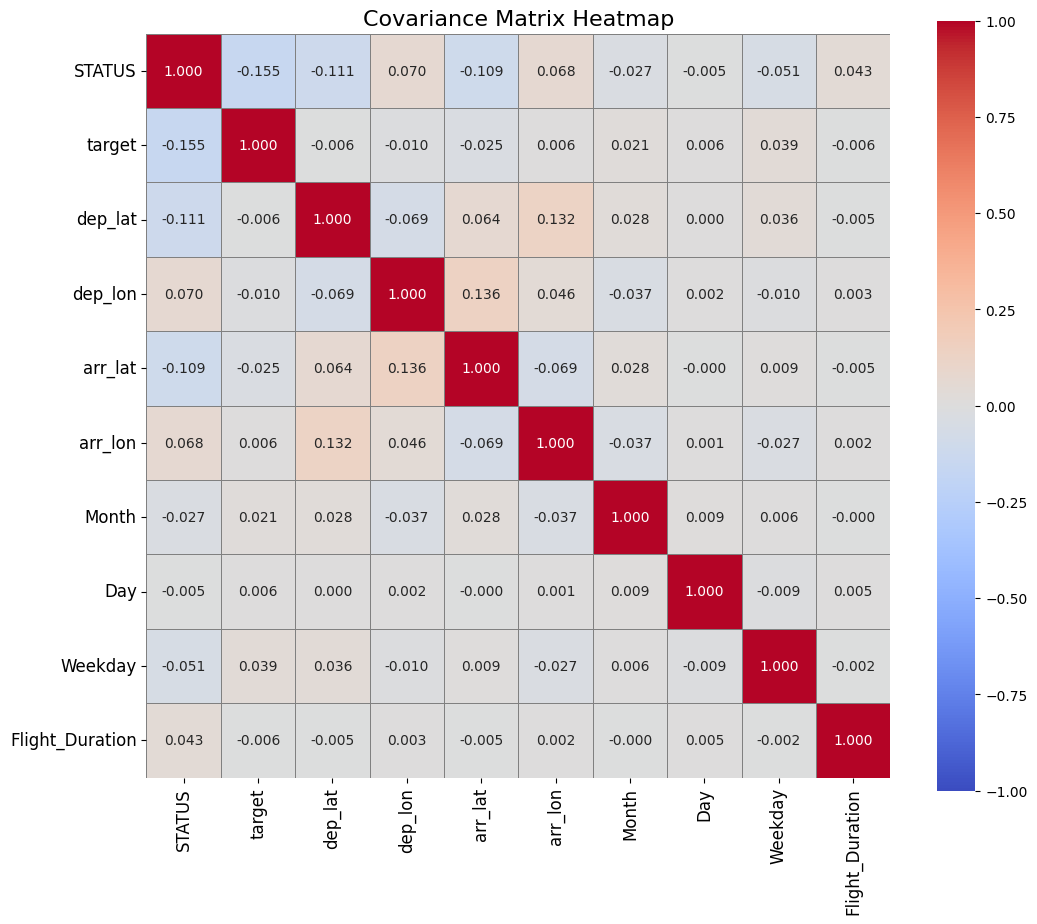

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm",vmin=-1, vmax=1,  linewidths=0.5, linecolor='grey', cbar=True, square=True)
plt.title("Covariance Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#status

<Axes: >

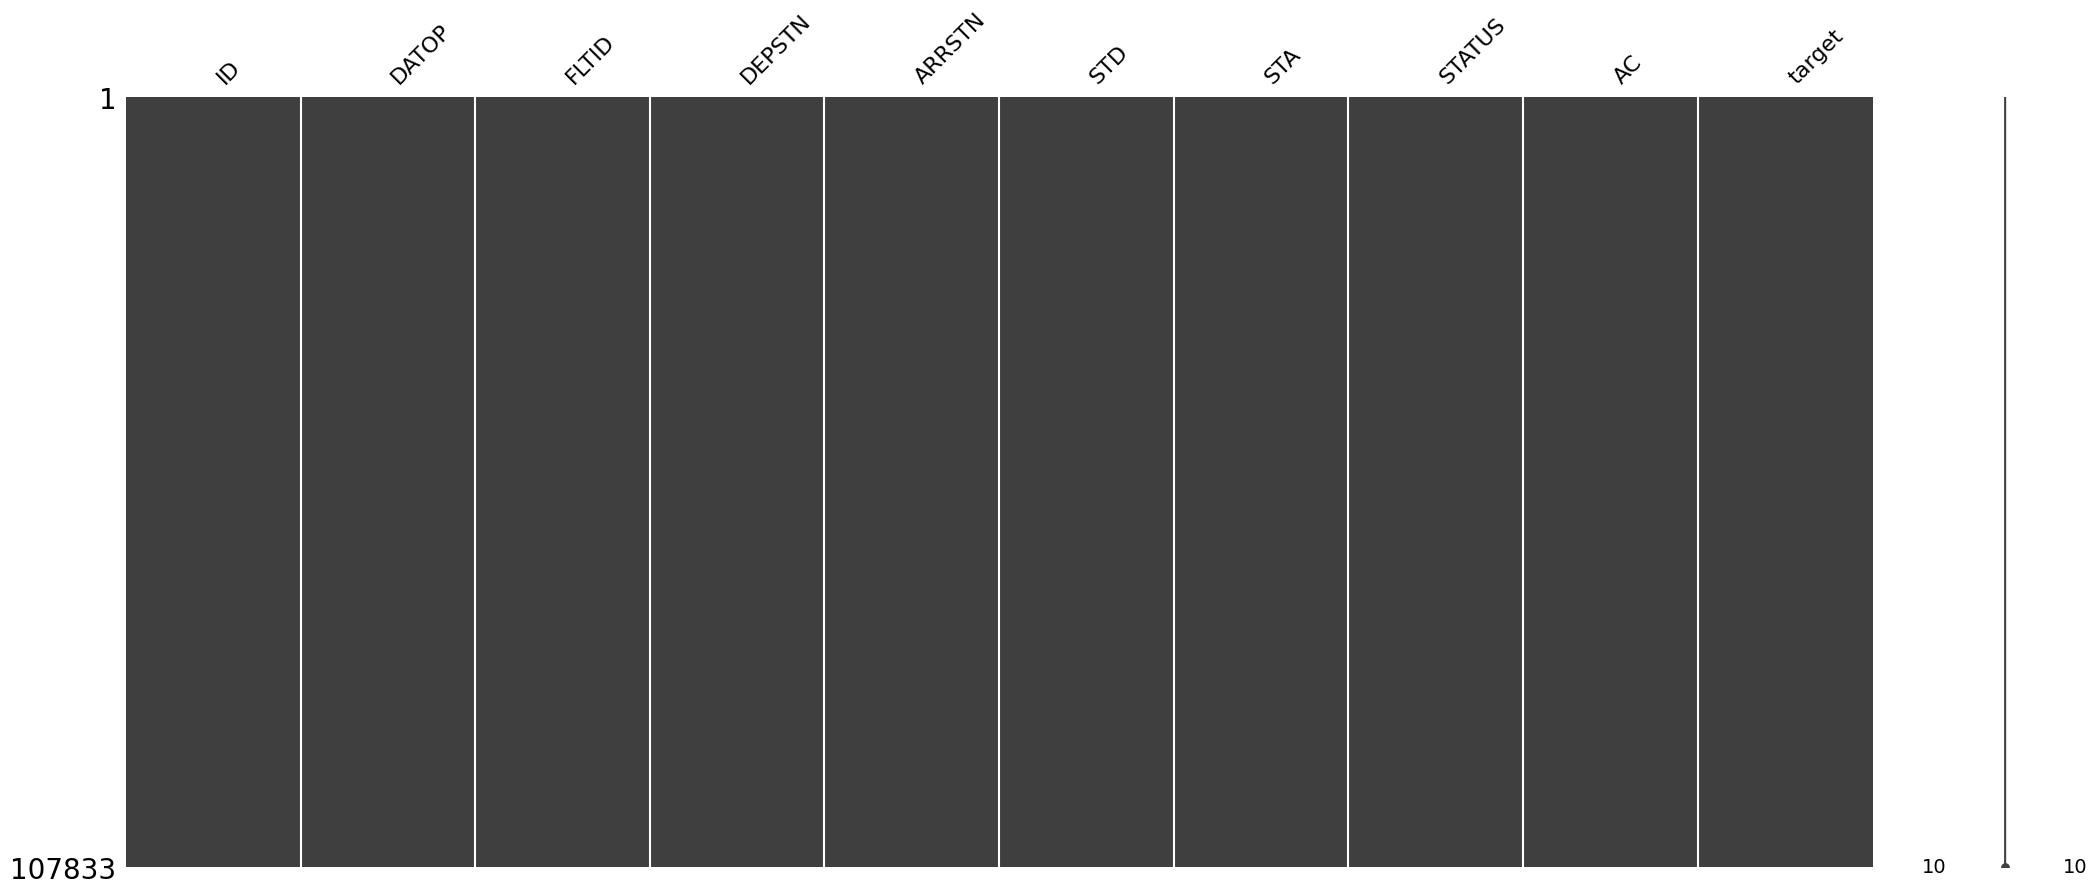

In [21]:
import missingno as msno

# Visualize missing values using the matrix plot
msno.matrix(df_train)


In [22]:
# Reorder columns
df = df[['FLTID','DATOP', 'Year', 'Month', 'Day', 'Weekday', 'DEPSTN', 'ARRSTN','STD_Date', 'STD_Time', 'STA_Date',
       'STA_Time', 'STATUS', 'AC', 'target']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   FLTID     107833 non-null  object        
 1   DATOP     107833 non-null  datetime64[ns]
 2   Year      107833 non-null  int32         
 3   Month     107833 non-null  int32         
 4   Day       107833 non-null  int32         
 5   Weekday   107833 non-null  int32         
 6   DEPSTN    107833 non-null  object        
 7   ARRSTN    107833 non-null  object        
 8   STD_Date  107833 non-null  object        
 9   STD_Time  107833 non-null  object        
 10  STA_Date  107833 non-null  object        
 11  STA_Time  107833 non-null  object        
 12  STATUS    107833 non-null  int64         
 13  AC        107833 non-null  object        
 14  target    107833 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(8)
memory usage: 10.7+ M

In [23]:
df

,FLTID,DATOP,Year,Month,Day,Weekday,DEPSTN,ARRSTN,STD_Date,STD_Time,STA_Date,STA_Time,STATUS,AC,target
0,TU 0712,2016-01-03,2016,1,3,6,CMN,TUN,2016-01-03,10:30:00,2016-01-03,12:55:00,0,TU 32AIMN,260.0
1,TU 0757,2016-01-13,2016,1,13,2,MXP,TUN,2016-01-13,15:05:00,2016-01-13,16:55:00,0,TU 31BIMO,20.0
2,TU 0214,2016-01-16,2016,1,16,5,TUN,IST,2016-01-16,04:10:00,2016-01-16,06:45:00,0,TU 32AIMN,0.0
3,TU 0480,2016-01-17,2016,1,17,6,DJE,NTE,2016-01-17,14:10:00,2016-01-17,17:00:00,0,TU 736IOK,0.0
4,TU 0338,2016-01-17,2016,1,17,6,TUN,ALG,2016-01-17,14:30:00,2016-01-17,15:50:00,0,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,WKL 0000,2018-07-05,2018,7,5,3,TUN,TUN,2018-07-05,23:00:00,2018-07-06,02:00:00,3,TU 32AIML,0.0
107829,UG 0003,2018-01-13,2018,1,13,5,DJE,TUN,2018-01-13,08:00:00,2018-01-13,09:00:00,3,UG AT7AT7,0.0
107830,SGT 0000,2018-11-07,2018,11,7,2,TUN,TUN,2018-11-07,05:00:00,2018-11-07,12:50:00,3,TU 736IOK,0.0
107831,UG 0010,2018-01-23,2018,1,23,1,TUN,DJE,2018-01-23,18:00:00,2018-01-23,18:45:00,0,TU CR9ISA,0.0


In [24]:
df_train.AC.value_counts()

AC
TU 320IMU    4724
TU 320IMW    4685
TU 320IMT    4634
TU 320IMR    4601
TU 320IMV    4589
             ... 
BJ 320INH       6
OL 321ABY       5
TU CR9XXX       2
TU 32A32A       2
TU 320320       1
Name: count, Length: 68, dtype: int64

In [25]:
# Confirm that the output is "True," which indicates that there is at least one missing value somewhere in the dataset.
df_train.isnull().values.any()

False

<Axes: ylabel='count'>

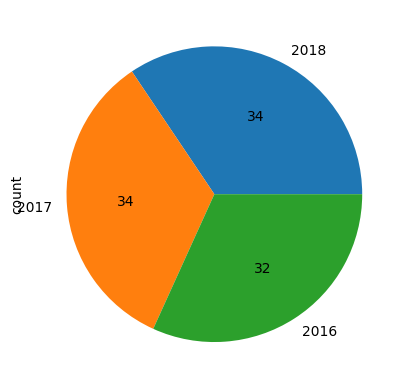

In [26]:
#univariate analysis
df.Year.value_counts().plot(kind = 'pie', autopct= '%.0f')

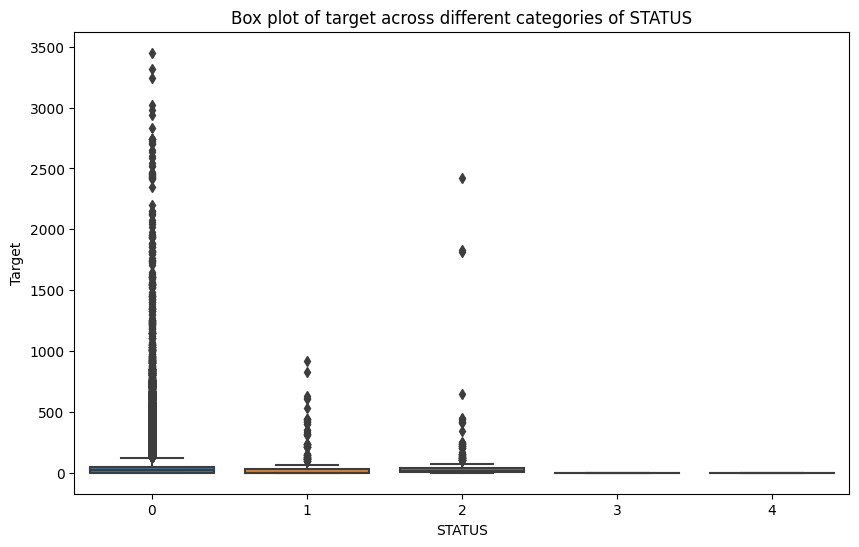

In [27]:
# Box plot to visualize the distribution of 'target' across different categories of 'STATUS'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='STATUS', y='target')
plt.title('Box plot of target across different categories of STATUS')
plt.xlabel('STATUS')
plt.ylabel('Target')
plt.show()


In [28]:

# Plotting box plots for each categorical column against the target variable
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categorical_columns), figsize=(10, 10))

for i, column in enumerate(categorical_columns):
    sns.boxplot(data=df, x=column, y='target', ax=axes[i])
    axes[i].set_title(f'Box plot of target across {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()


NameError: name 'categorical_columns' is not defined

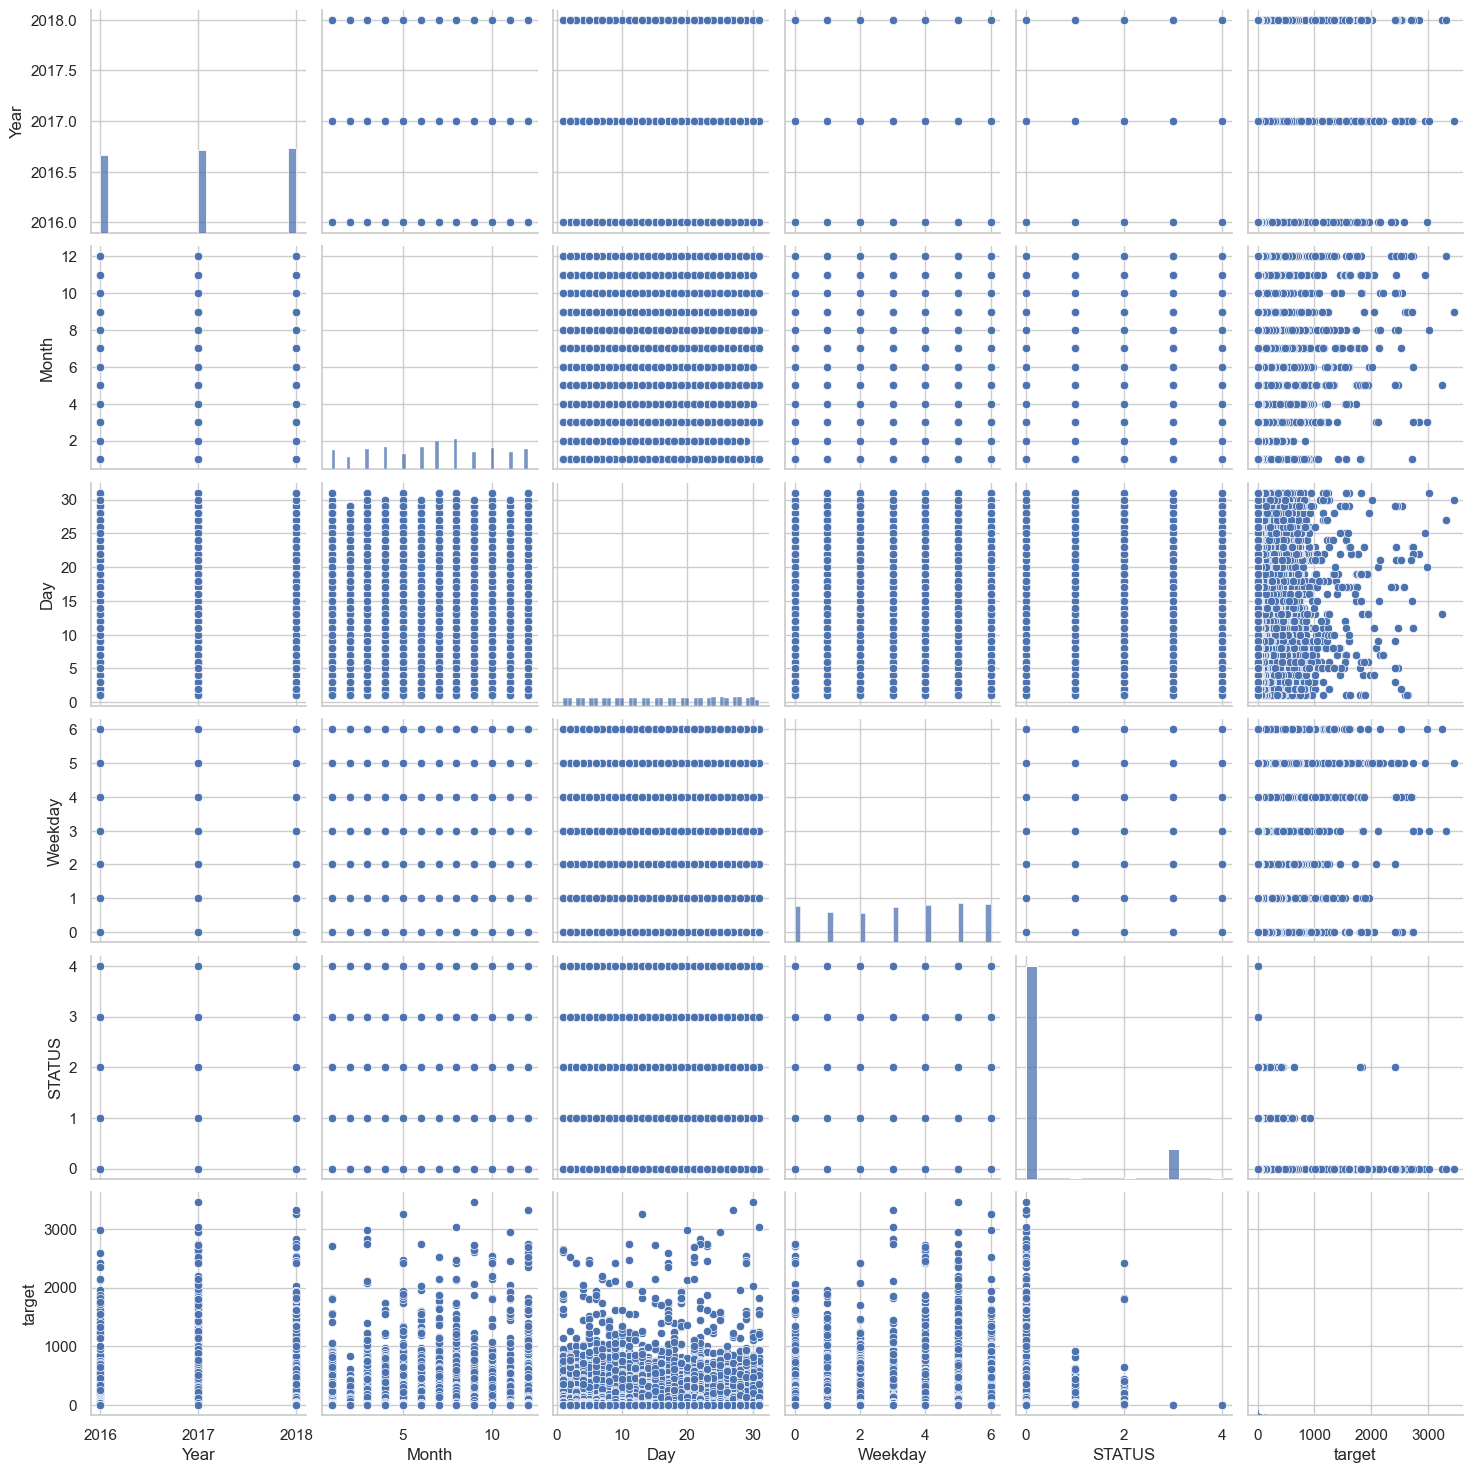

In [29]:
sns.pairplot(df)

# Data cleaningin and feature engineering

## Splitting data for testing 

In [30]:
df.columns

Index(['FLTID', 'DATOP', 'Year', 'Month', 'Day', 'Weekday', 'DEPSTN', 'ARRSTN',
       'STD_Date', 'STD_Time', 'STA_Date', 'STA_Time', 'STATUS', 'AC',
       'target'],
      dtype='object')

In [31]:
df.STATUS.unique()

array([0, 1, 2, 3, 4])

In [33]:

# Define mapping dictionary
status_mapping = {'ATA': 0, 'DEP': 1, 'RTR': 2, 'SCH': 3, 'DEL': 4}

# Map the values in the 'STATUS' column using the mapping dictionary
df['STATUS'] = df['STATUS'].map(status_mapping)

# Print the unique values in the 'STATUS' column
print(df['STATUS'].unique()) 

[nan]


In [36]:
df.isnull().sum()

Month            0
Day              0
Weekday          0
DEPSTN           0
ARRSTN           0
STD_Date         0
STA_Date         0
STATUS      107833
target           0
dtype: int64

In [37]:
# Strongly Correlated Features (Absolute Correlation > 0.1): 
#     ['STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon']
# Moderately Correlated Features (Absolute Correlation > 0.05): 
#     ['STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Weekday']

#['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']
df2.columns

Index(['STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month',
       'Day', 'Weekday', 'Flight_Duration'],
      dtype='object')

In [38]:
# Drop rows with null values
df2.dropna(inplace=True)

# Check for null values after dropping
print(df2.isnull().sum())

STATUS             0
target             0
dep_lat            0
dep_lon            0
arr_lat            0
arr_lon            0
Month              0
Day                0
Weekday            0
Flight_Duration    0
dtype: int64


In [39]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [51]:
df

,Month,Day,Weekday,DEPSTN,ARRSTN,STD_Date,STA_Date,STATUS,target
0,1,3,6,CMN,TUN,2016-01-03,2016-01-03,NaN,260.0
1,1,13,2,MXP,TUN,2016-01-13,2016-01-13,NaN,20.0
2,1,16,5,TUN,IST,2016-01-16,2016-01-16,NaN,0.0
3,1,17,6,DJE,NTE,2016-01-17,2016-01-17,NaN,0.0
4,1,17,6,TUN,ALG,2016-01-17,2016-01-17,NaN,22.0
...,...,...,...,...,...,...,...,...,...
107828,7,5,3,TUN,TUN,2018-07-05,2018-07-06,NaN,0.0
107829,1,13,5,DJE,TUN,2018-01-13,2018-01-13,NaN,0.0
107830,11,7,2,TUN,TUN,2018-11-07,2018-11-07,NaN,0.0
107831,1,23,1,TUN,DJE,2018-01-23,2018-01-23,NaN,0.0


In [54]:
from scipy import stats
# Example DataFrame df
# Assuming df is your DataFrame
# Calculate z-scores
z_scores = stats.zscore(df2)
# Define threshold for z-score
threshold = 3
# Find outliers
outlier_indices = (z_scores > threshold).any(axis=1)
# Create new DataFrame without outliers
df_no = df2[~outlier_indices]
# Optionally, you can reset the index of the new DataFrame
df_no.reset_index(drop=True, inplace=True)
df_no

,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
0,0,260.0,33.367500,-7.58997,36.851002,10.22720,1,3,6,145.0
1,0,20.0,45.630600,8.72811,36.851002,10.22720,1,13,2,110.0
2,0,0.0,36.851002,10.22720,41.275333,28.75200,1,16,5,155.0
3,0,0.0,33.875000,10.77550,47.153198,-1.61073,1,17,6,170.0
4,0,22.0,36.851002,10.22720,36.691002,3.21541,1,17,6,80.0
...,...,...,...,...,...,...,...,...,...,...
100147,3,0.0,36.851002,10.22720,36.851002,10.22720,7,5,3,180.0
100148,3,0.0,33.875000,10.77550,36.851002,10.22720,1,13,5,60.0
100149,3,0.0,36.851002,10.22720,36.851002,10.22720,11,7,2,470.0
100150,0,0.0,36.851002,10.22720,33.875000,10.77550,1,23,1,45.0


In [55]:
X = df_no[['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']]
y = df_no['target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (80121, 8)
X_test shape: (20031, 8)
y_train shape: (80121,)
y_test shape: (20031,)


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Specify the columns with missing values (latitude and longitude)
missing_cols = ['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon']

# Create a ColumnTransformer to apply imputation only to specified columns
trf1 = ColumnTransformer(transformers=[
    ('impute_cols', SimpleImputer(strategy='most_frequent'), missing_cols)],
     remainder='passthrough')


In [59]:
from sklearn.preprocessing import StandardScaler

# Define the transformer to apply StandardScaler to all numeric columns
trf2 = ColumnTransformer([
    ('scale_cols', StandardScaler(), slice(0, -1))  # Apply StandardScaler to all numeric columns
])

In [73]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [74]:
y_pred = model.predict(X_test)

In [77]:
r2 = r2_score(y_test, y_pred)
print (r2)
mse = mean_squared_error(y_test, y_pred)
print (mse)

0.011455570536870074
3849.048554822772


In [ ]:
#ceating pipe

pipe = Pipeline([
        #('trf1', trf1),
        ('trf2', trf2),
        ('model', model)
        ])

In [ ]:
pipe.fit(X_train, y_train,)

Pipeline(steps=[('trf2',
                 ColumnTransformer(transformers=[('scale_cols',
                                                  StandardScaler(),
                                                  slice(0, -1, None))])),
                ('model', LogisticRegression(C=0.001, max_iter=10))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 15283.006951247959
R^2 Score: -0.18313202342797608


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters grid
param_grid = {
    'model__C': [0.001, 0.01],  # Regularization strength
    'model__penalty': ['l1', 'l2'],               # Penalty type
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10, n_jobs= -1, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)


/Users/paganimaltempo/PROJECTS/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paganimaltempo/PROJECTS/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best Parameters: {'model__penalty': 'l2', 'model__C': 0.01}
Best Negative Mean Squared Error: -16126.18403534829


In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf2',
                 ColumnTransformer(transformers=[('scale_cols',
                                                  StandardScaler(),
                                                  slice(0, -1, None))])),
                ('model', LogisticRegression(C=0.001, max_iter=10))])

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
predictions = model.predict(X)

## Trainining the model